# Malignant Comments Classifier Project

## PROBLEM STATEMENT

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 


### Data Description
-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 

In [2]:
#Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the train data set
df_train=pd.read_csv('train.csv')
df_train.head(8)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0


In [4]:
#Loading the test data set
df_test=pd.read_csv('test.csv')
df_test.head(8)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.


In [5]:
#Checking the shape of train dataset

df_train.shape

(159571, 8)

There are 159571 rows and 8 columns present in the train dataset.

In [6]:
#Checking the shape of test dataset
df_test.shape

(153164, 2)

There are 153164 rows and 2 columns present in the test dataset.

In [7]:
#Checking the info of train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
#Checking the info of test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [9]:
#Checking the data types of train dataset
df_train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

id and comment_text shows the object datatype and the rest of the columns are integer datatypes.

In [10]:
#Checking the data types of test dataset
df_test.dtypes

id              object
comment_text    object
dtype: object

In test dataset contain only 2 columns id and comment_text both are object datatype.

In [11]:
#Checking the column names in the train dataset
df_train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [12]:
#Checking the count in the train dataset
for i in df_train:
    print(df_train[i].value_counts())
    print("********************************************************************")
    print('\n')

8699ccf694670ad0    1
fca5d596bd53c734    1
3f926e2bd2e7f06f    1
c89de67461409a56    1
43e251a98c21a525    1
                   ..
7c08a8c24cf02ff7    1
e87a3434b1d8f991    1
e355f94252dd5112    1
af52da514310ce23    1
c3217a440784311b    1
Name: id, Length: 159571, dtype: int64
********************************************************************


Most Successful team?\nThis must be up for debate as Rangers have never won the European Cup/Champions League and as far as im aware have only won one European trophy,the now defunct European Cup Winners Cup\n\n Nicknames \n\nI think huns should be added. There are some other unofficial nicknames on the page and I see no reason why this common (and popular) nickname should not be added.\n\nIt's not that bad if you think about it. It really is only three letters; UNHS. Any opinions on this?\n\nReally it is a good idea. Kind of 'pride of preduduss.' Kind of like the Scots accepting Jock in a post-modern funny man kinda way, well done, mate!\n

Here is the count of all the columns that are present in the train dataset.

In [13]:
#Checking the count of values in the test dataset
for i in df_test:
    print(df_test[i].value_counts())
    print("**********************************************************")
    print('\n')

07262fce3be915b0    1
a143e861621fb872    1
a34f8c9bbbd845db    1
038928e3e7f2d703    1
8f3c131aea85448b    1
                   ..
c92369b225d1496d    1
afebc4d6f32ea197    1
7d0063e8e2d02ffa    1
dab7cdd7f4ade360    1
8d008f591984efeb    1
Name: id, Length: 153164, dtype: int64
**********************************************************


Both are about the same festival. Very interestingly, Krishna Janmaashtami gives a South Indian version. 'little feet drawn with flour paste' afaik, is done only in the South. Likewise Gokulashtami, Sreekrishna jayanyti (incorrectly mentioned in the article as Sree jayanti are terms used in the South. Janmashtami  gives a northern perspective and how it is celebrated there. Sounds confusing ? -)                                                                                                                                                                                                                                                                    

Here is the count of values in the test dataset. In id and comment both have 153164 rows.

In [14]:
#Checking the null values in the train dataset
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

There is no value present in the train dataset.

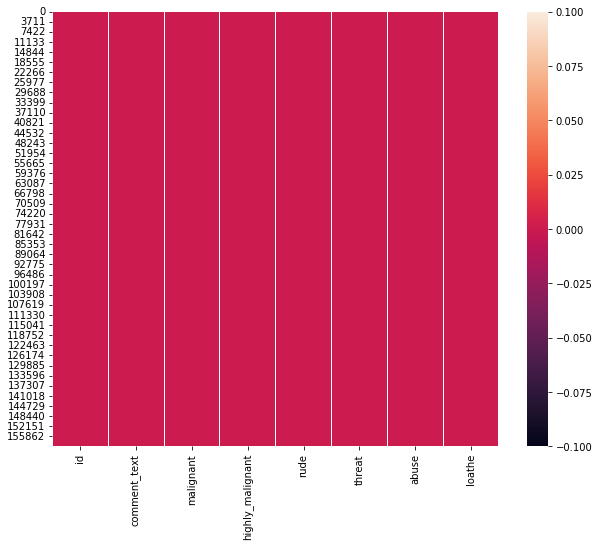

In [15]:
#Visualizing the data using the heatmap to check if there is any null value
plt.figure(figsize=(10,8))
sns.heatmap(df_train.isnull())
plt.show()

In [16]:
#Checking the nullvalue in the test dataset
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

There is no value present in the test dataset.

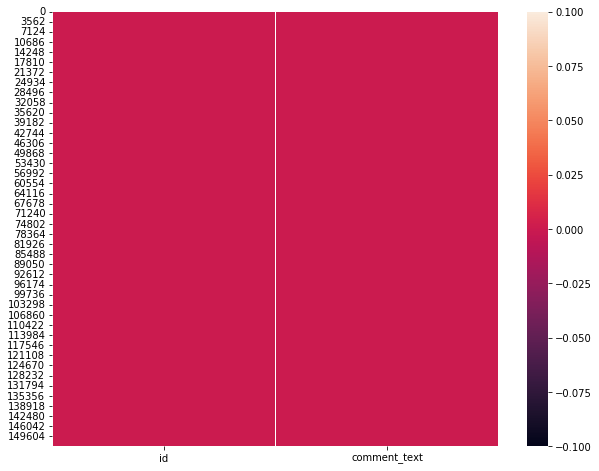

In [17]:
#Visualizing the data using the heatmap to check if there is any null value
plt.figure(figsize=(10,8))
sns.heatmap(df_test.isnull())
plt.show()

In [18]:
#Checking the description of train dataset
df_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We see that in all the column the count is 159571, that means there is no null values in the data. We see the mean, median, minumium and maximum value of each columns. For all the column minimum value is 0 and maximum value is 1. That is because the data is binary, it will be either 0 or 1. It is a Regression problem. Here mean is greater than median.

In [19]:
#Checking the description of test dataset
df_test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,07262fce3be915b0,Both are about the same festival. Very interes...
freq,1,1


In [20]:
#Checking the unique values in the train dataset
df_train.nunique()

id                  159571
comment_text        159571
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

In [21]:
#Checking the unique value in the test dataset
df_test.nunique()

id              153164
comment_text    153164
dtype: int64

In [22]:
#Checking the duplicate value in the train dataset
df_train.duplicated().sum()

0

There is no duplicate value in the train dataset.

In [23]:
#Checking the duplicate value in the test dataset
df_test.duplicated().sum()

0

There is no duplicate value in the test dataset as well.

In [24]:
# Dropping the column id from the train dataset.

df_train=df_train.drop(columns='id',axis=1)
df_train.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0


0    144277
1     15294
Name: malignant, dtype: int64


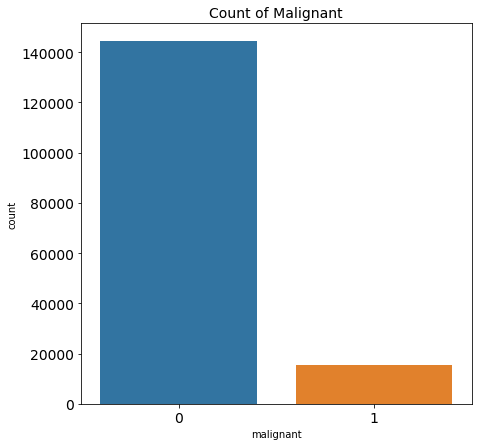

In [25]:
#Checking the count of Malignant.
plt.figure(figsize=(7,7))
print(df_train['malignant'].value_counts())
sns.countplot(df_train['malignant'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Count of Malignant',fontsize=14)
plt.show()

0    157976
1      1595
Name: highly_malignant, dtype: int64


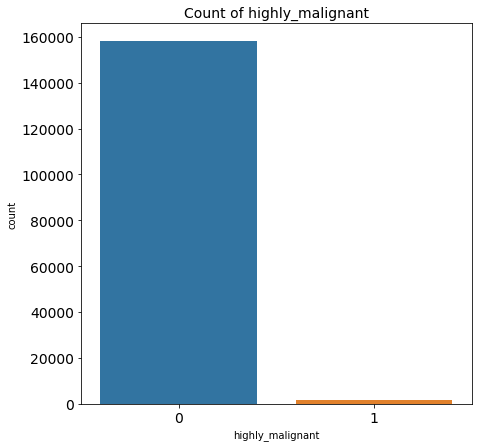

In [26]:
#Checking the count of highly_malignant.
plt.figure(figsize=(7,7))
print(df_train['highly_malignant'].value_counts())
sns.countplot(df_train['highly_malignant'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Count of highly_malignant',fontsize=14)
plt.show()

0    151122
1      8449
Name: rude, dtype: int64


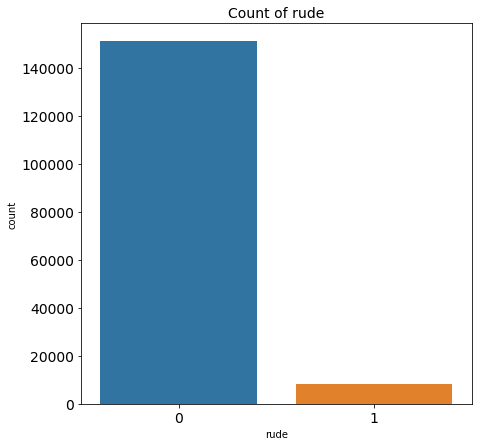

In [27]:
#Checking the count of rude.
plt.figure(figsize=(7,7))
print(df_train['rude'].value_counts())
sns.countplot(df_train['rude'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Count of rude',fontsize=14)
plt.show()

0    159093
1       478
Name: threat, dtype: int64


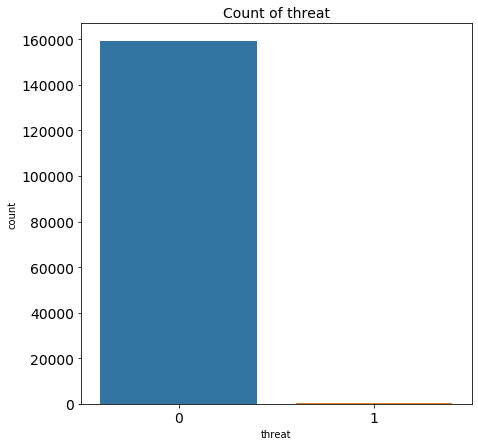

In [28]:
#Checking the count of thread.
plt.figure(figsize=(7,7))
print(df_train['threat'].value_counts())
sns.countplot(df_train['threat'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Count of threat',fontsize=14)
plt.show()

0    151694
1      7877
Name: abuse, dtype: int64


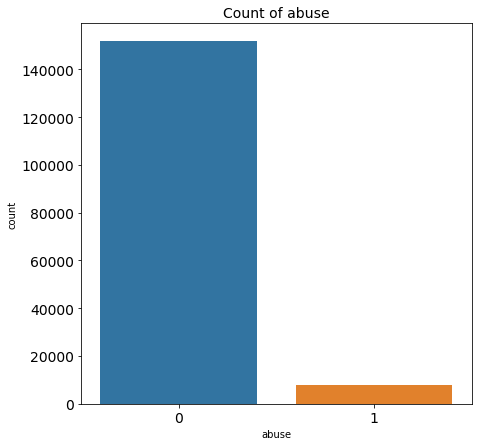

In [29]:
#Checking the count of abuse.
plt.figure(figsize=(7,7))
print(df_train['abuse'].value_counts())
sns.countplot(df_train['abuse'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Count of abuse',fontsize=14)
plt.show()

0    158166
1      1405
Name: loathe, dtype: int64


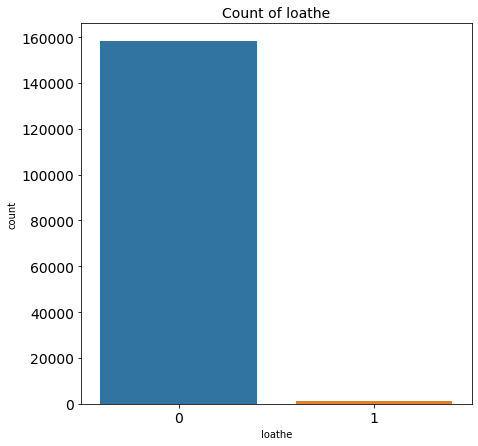

In [30]:
#Checking the count of loathe.
plt.figure(figsize=(7,7))
print(df_train['loathe'].value_counts())
sns.countplot(df_train['loathe'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Count of loathe',fontsize=14)
plt.show()

In [31]:
from wordcloud import WordCloud

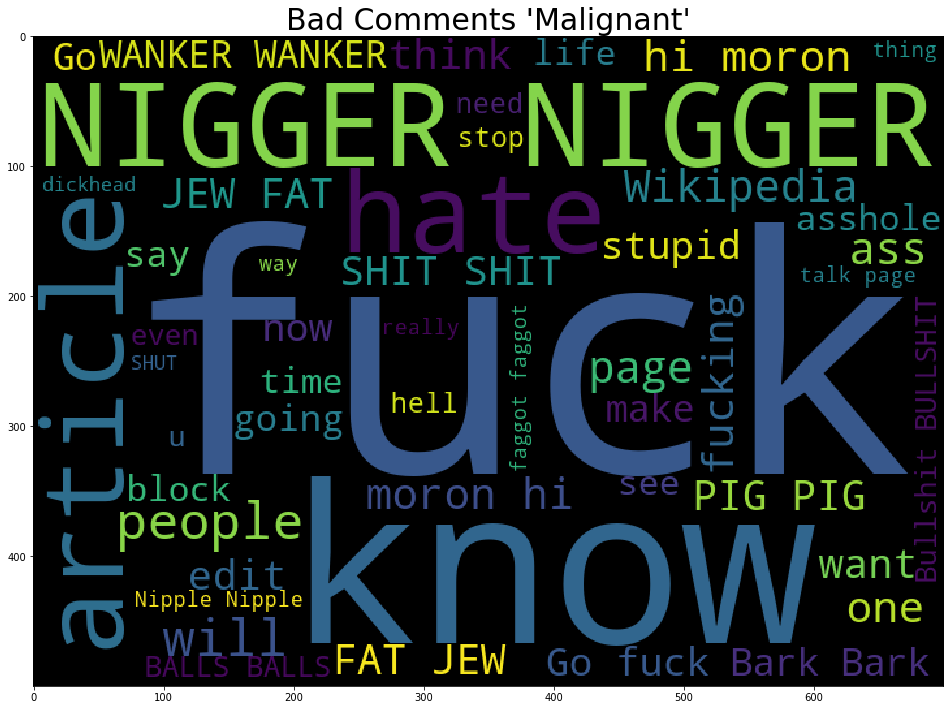

In [32]:
#Checking the bad comments that are Malignant
plt.figure(figsize=(13,10))
malignant=df_train['comment_text'][df_train['malignant']==1]
malignant_cloud=WordCloud(height=500,width=700,background_color='black',max_words=50).generate(''.join(malignant))
plt.imshow(malignant_cloud)
plt.title("Bad Comments 'Malignant'",fontsize=30)
plt.tight_layout(pad=0)
plt.show()

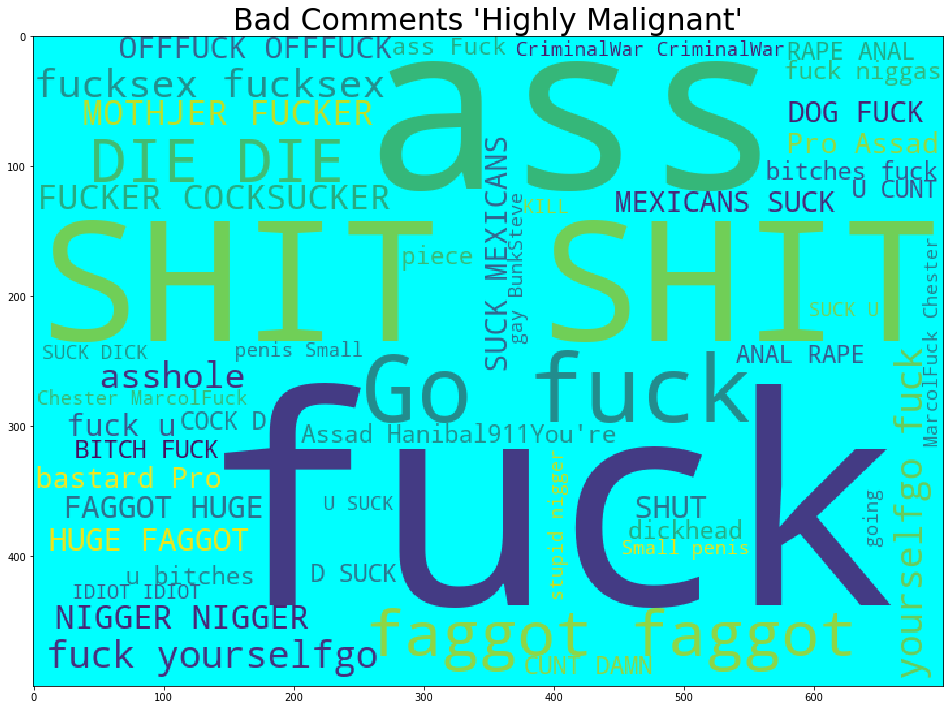

In [33]:
#Checking the bad comments that are highly malignant
plt.figure(figsize=(13,10))
highly_malignant=df_train['comment_text'][df_train['highly_malignant']==1]
highly_malignant_cloud=WordCloud(height=500,width=700,background_color='cyan',max_words=50).generate(''.join(highly_malignant))
plt.imshow(highly_malignant_cloud)
plt.title("Bad Comments 'Highly Malignant'",fontsize=30)
plt.tight_layout(pad=0)
plt.show()

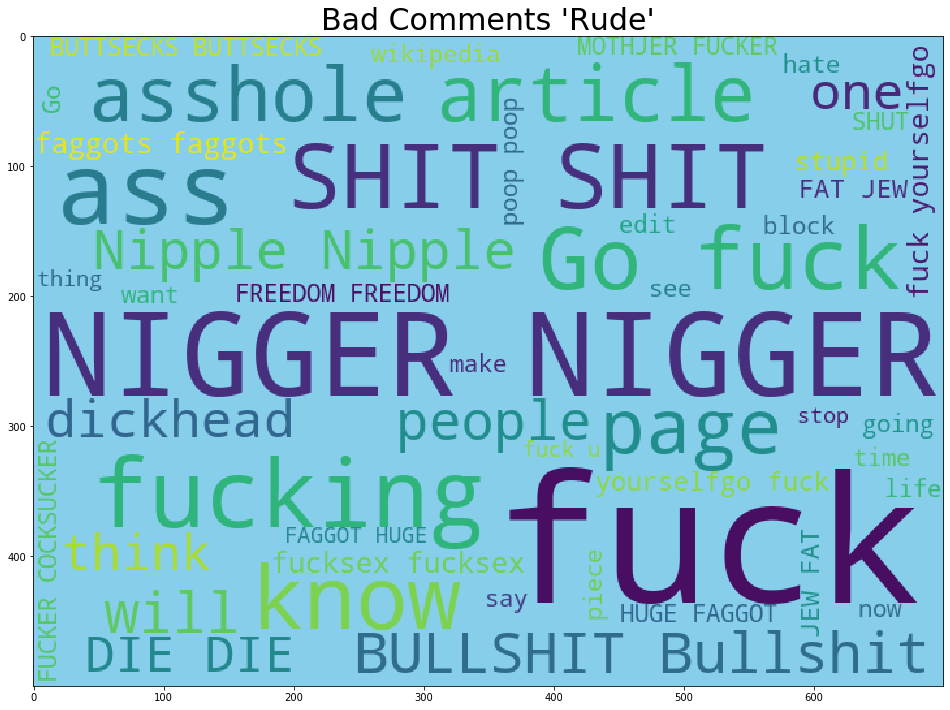

In [34]:
#Checking the bad comments that are rude
plt.figure(figsize=(13,10))
rude=df_train['comment_text'][df_train['rude']==1]
rude=WordCloud(height=500,width=700,background_color='skyblue',max_words=50).generate(''.join(rude))
plt.imshow(rude)
plt.title("Bad Comments 'Rude'",fontsize=30)
plt.tight_layout(pad=0)
plt.show()

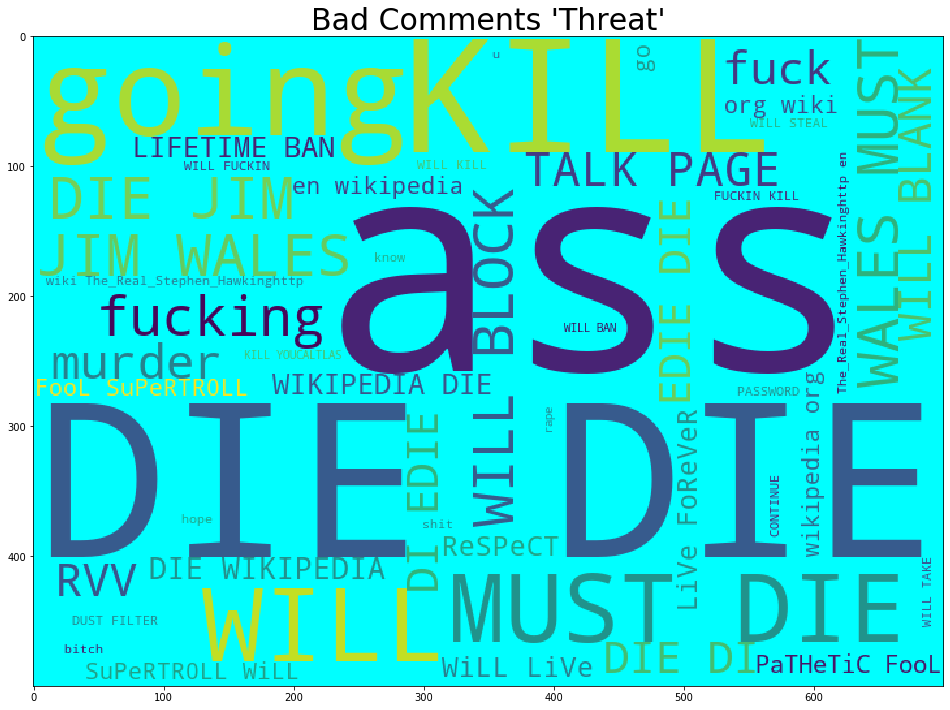

In [35]:
#Checking the bad comments that are threat
plt.figure(figsize=(13,10))
threat=df_train['comment_text'][df_train['threat']==1]
threat_cloud=WordCloud(height=500,width=700,background_color='aqua',max_words=50).generate(''.join(threat))
plt.imshow(threat_cloud)
plt.title("Bad Comments 'Threat'",fontsize=30)
plt.tight_layout(pad=0)
plt.show()

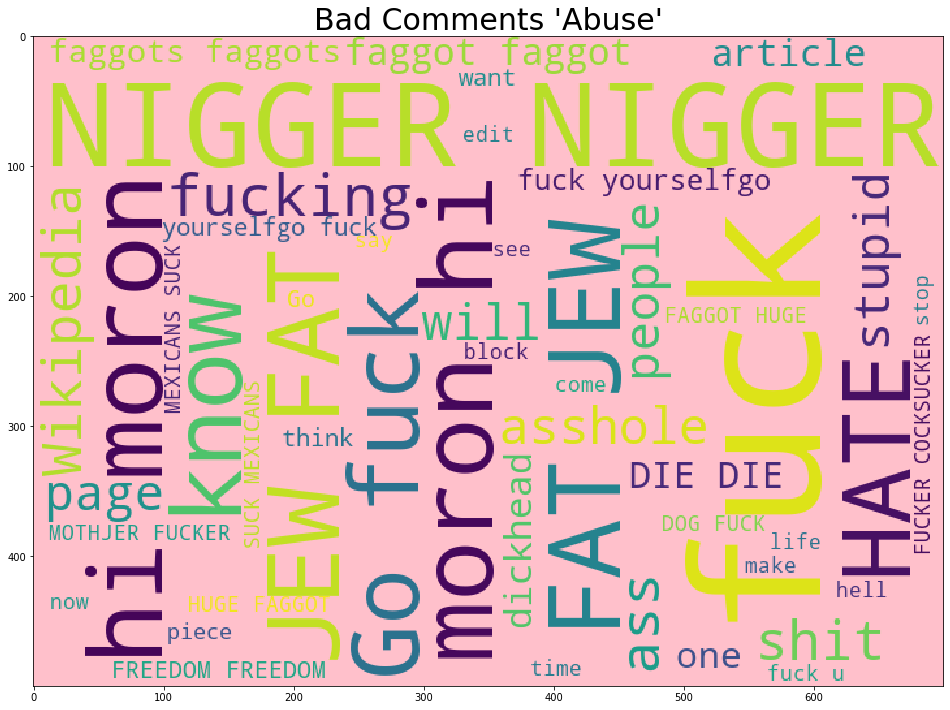

In [36]:
#Checking the bad comments that are abusive in nature
plt.figure(figsize=(13,10))
abuse=df_train['comment_text'][df_train['abuse']==1]
abuse_cloud=WordCloud(height=500,width=700,background_color='pink',max_words=50).generate(''.join(abuse))
plt.imshow(abuse_cloud)
plt.title("Bad Comments 'Abuse'",fontsize=30)
plt.tight_layout(pad=0)
plt.show()

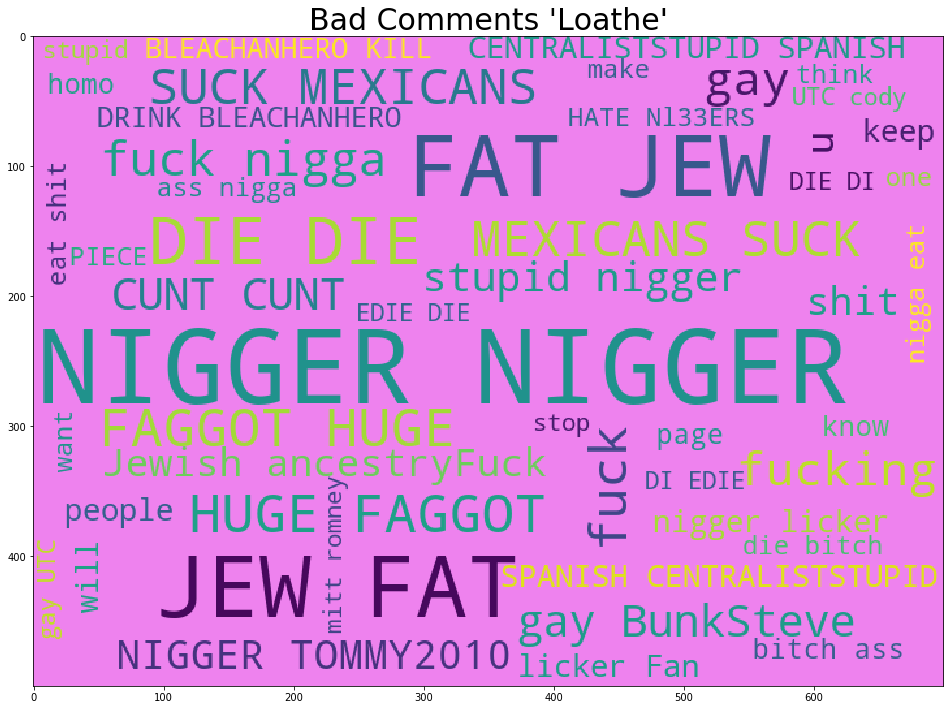

In [37]:
#Checking the bad comments that are loathe
plt.figure(figsize=(13,10))
loathe=df_train['comment_text'][df_train['loathe']==1]
loathe_cloud=WordCloud(height=500,width=700,background_color='violet',max_words=50).generate(''.join(loathe))
plt.imshow(loathe_cloud)
plt.title("Bad Comments 'Loathe'",fontsize=30)
plt.tight_layout(pad=0)
plt.show()

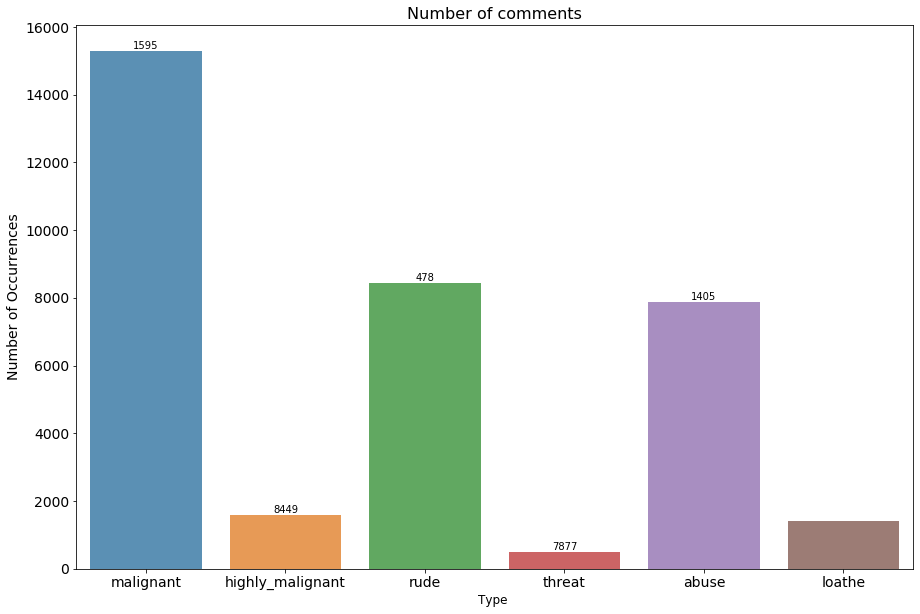

In [38]:
#Checking the Number of comments in each class
plt.figure(figsize=(15,10))
ax = sns.barplot(df_train.iloc[:,1:].sum().index, df_train.iloc[:,1:].sum().values, alpha=0.8)
plt.title("Number of comments",fontsize=16)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xlabel('Type ', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
rects = ax.patches
labels = df_train.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In the above barplot we see that Malignant comment count is high as compare to others.

In [39]:
df_train['comment_text'].head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In the comment text it contains \n punctuation , stop words. Let's do the cleaning in the comment text

In [40]:
df_train['comment_text']=df_train['comment_text'].str.lower() #Making the comment text to lower case

In [41]:
#Replacing the '\n' with ''
df_train['comment_text']=df_train['comment_text'].str.replace('\n',' ')

In [42]:
#Keeping only the words which is starts with a-z, 0-9
from nltk.tokenize import regexp_tokenize
df_train['comment_text']=df_train['comment_text'].apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

In [43]:
#Getting the stop words in English

from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

In [44]:
print(stopwords)

{'does', 'when', 'under', 'been', 't', 'yourselves', 'doing', 'has', 'of', 'will', "wouldn't", 'ourselves', 'both', 'why', 'did', 'don', 'i', "you've", "that'll", 'hadn', 'weren', "hasn't", "doesn't", 'at', "aren't", 'theirs', "it's", 'off', 'wasn', 'is', 'mustn', 'few', 'same', 'for', 'didn', 'on', 'some', 'after', 'he', 'all', "won't", "haven't", 'there', "shouldn't", 'out', "wasn't", 'an', 'during', 'had', 'd', 'm', 'up', 'who', 'down', 'above', 'what', 'hers', 'll', "needn't", 'have', 'these', 'haven', 'or', 'him', 'because', 'further', 'her', 'won', 'ma', "isn't", 'o', 'ain', 'such', 'needn', 'too', 've', 'to', 'not', 'where', "shan't", 'isn', 'here', "she's", 'his', 'as', 'other', 'below', 'wouldn', 're', 'himself', 'yourself', 'which', "mightn't", 'so', 'with', 'myself', 'whom', 'me', 'no', 'from', 'should', 'be', 'own', "you'll", 'about', 'very', 'she', "didn't", 'but', 'doesn', 'hasn', 'once', 'shan', 'herself', 'then', "don't", 'we', 'them', 'they', 'can', 'through', 'only', 

In [45]:
print(len(stopwords)) #Before adding the custom words the count of stop words is 197

179


In [46]:
#Updating the stop words by adding a-z
for cha in range(ord('a'),ord('z')+1):
    stopwords.update(chr(cha))
    
    

In [47]:
#Updating stop_words further by adding some custom words
custom_words = ("d'aww","mr","hmm","umm","also","maybe","that's","he's","she's","i'll","he'll","she'll","us",
                "ok","there's","hey","heh","hi","oh","bbq","i'm","i've","nt","can't","could","ur","re","ve",
                "rofl","lol","stfu","lmk","ily","yolo","smh","lmfao","nvm","ikr","ofc","omg","ilu")
stopwords.update(custom_words)

In [48]:
print(len(stopwords)) #After adding the custom words the count of stop words is 235. We have added 38 custom words in the stop words.

235


In [49]:
#Removing the stop words from the comment text field

df_train['comment_text']=df_train['comment_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords).strip())

In [50]:
#Removing the punctuation
df_train['comment_text']=df_train['comment_text'].str.replace("[^\w\d\s]","")

In [51]:
df_train.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
99989,noticed think good start,0,0,0,0,0,0
8938,president rumors snipping confirmed wayne pres...,0,0,0,0,0,0
148146,meta language codes conflicts list conflicts l...,0,0,0,0,0,0
11356,would like suggest link gives detailed breakdo...,0,0,0,0,0,0
21539,nonsense thing formal warning anyways please b...,0,0,0,0,0,0
93401,stop lock hole,1,0,0,0,0,0
40250,yep ed kind enough semi talk hours theyll go p...,0,0,0,0,0,0
33006,retard shut fud good guy scientus user william...,1,0,0,0,1,0
46101,deeceevoice way thinking africoid something li...,0,0,0,0,0,0
78348,excellent observation frania wholeheartedly ag...,0,0,0,0,0,0


Now our comments text looks quite nice without stopwords, punctuation.

In [52]:
#Replace '\n' with " " from test dataset
df_test['comment_text']=df_test['comment_text'].str.replace('\n'," ")

In [53]:
#Making the comments to lower case
df_test['comment_text']=df_test['comment_text'].str.lower()

In [54]:
#Keeping only the word with having a-z, 0-9
df_test['comment_text']=df_test['comment_text'].apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

In [55]:
#Removing the punctuation
df_test['comment_text']=df_test['comment_text'].str.replace("[^\w\d\s]","")

In [56]:
df_test.sample(10)

,id,comment_text
105888,b0be2cee787e4044,re thank you zora dont worry i have already lo...
73475,7a75facb80ac5227,elephants are fat stupid
89231,94cbf7ae488ed7f1,redirect talk andersons white bellied rat
125945,d2686817a3a91ad9,that mini edit war was so stupid so does this ...
50155,5343d7613a01f1a1,saggetrisus saggetrisus is a rare disease that...
81394,87d2a0713a4d2775,suggesting that calling something stupid is a ...
98298,a40226e2cc2d6cb9,all i did was change a sentence so that it did...
138118,e6e1b82f72091ca0,support per nominators long list
4655,07e983926ca52336,perhaps but the usage in the discography seems...
15918,1ab6ffbe7d8bb082,killing teenagers this line police departments...


We have removed the punctuation, \n from the test dataset

In [57]:
df=['malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']

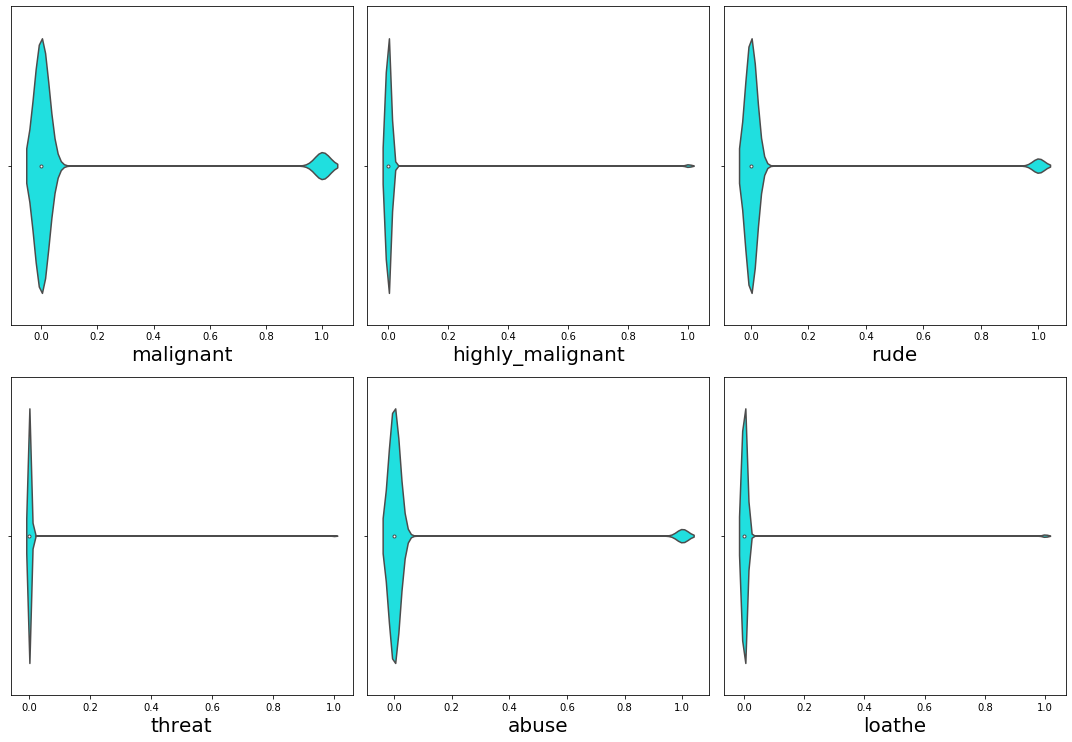

In [58]:
plt.figure(figsize=(15,15))
plot_number=1
for i in df:
    if plot_number<=6:
        ax=plt.subplot(3,3,plot_number)
        sns.violinplot(df_train[i],color='aqua')
        plt.xlabel(i,fontsize=20)
    plot_number+=1
plt.tight_layout()

We can see that from above violinplot that 0 have a very high good as compare to 1.

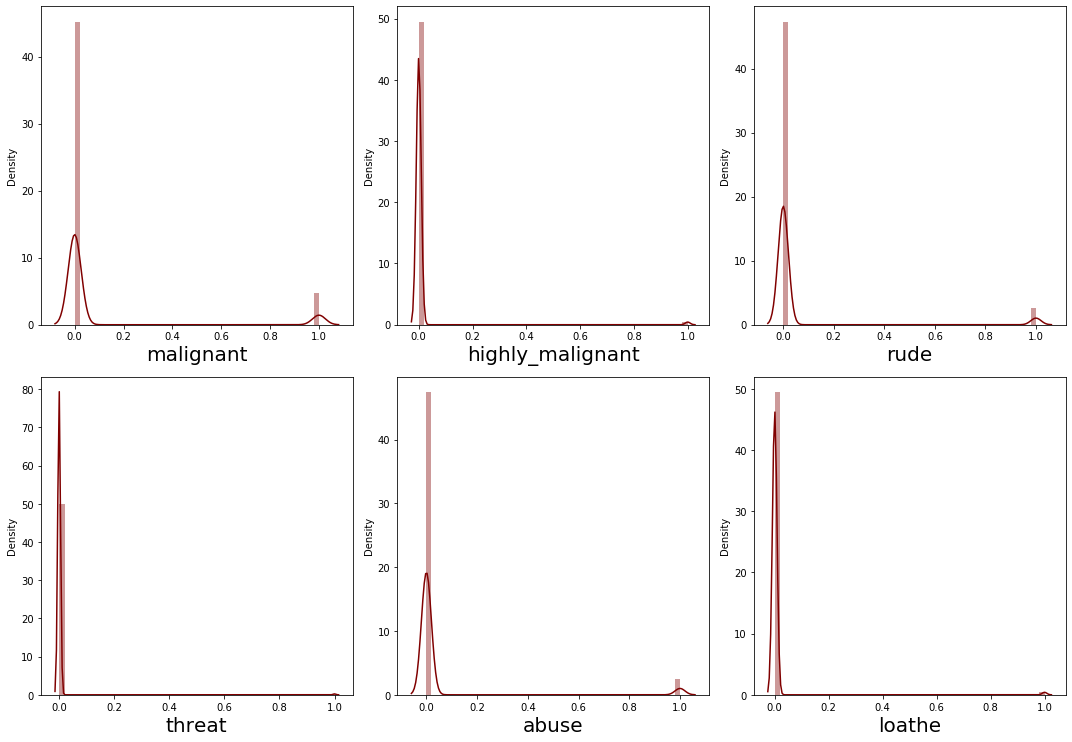

In [59]:
#Visualizing the distribution plot from the train dataset.
plt.figure(figsize=(15,15))
plot_number=1
for i in df:
    if plot_number<=6:
        ax=plt.subplot(3,3,plot_number)
        sns.distplot(df_train[i],color='maroon')
        plt.xlabel(i,fontsize=20)
    plot_number+=1
plt.tight_layout()

From the above distribution plot we see that the curve is high where there is high count. In threat 1 the tail is flat. That means very less bad comments in the threat. In all the column the good comments count is high than the bad comments.

In [60]:
#Checking the correlation

df_train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


Here is the correlation of all the columns. Malignant is highly correlated than others.

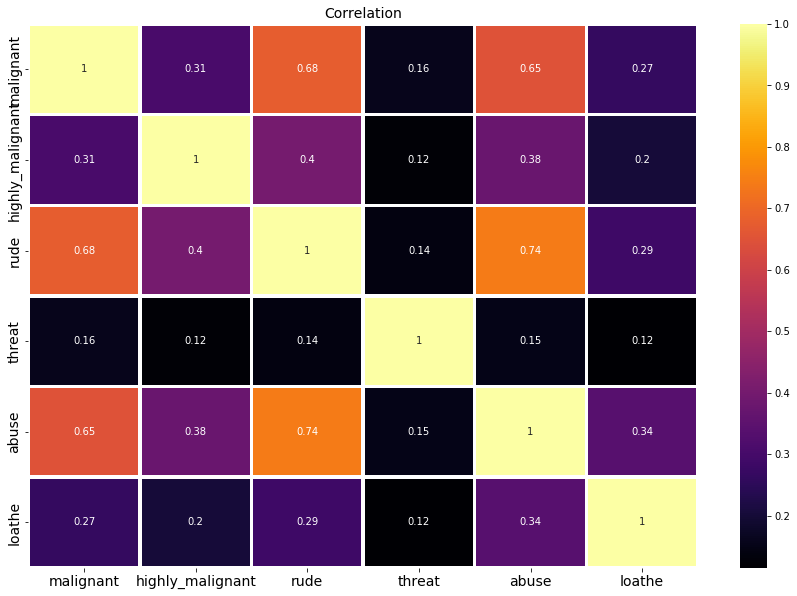

In [61]:
#Visualizing the correlation using the heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(),annot=True,cmap='inferno',linewidth=2.5)
plt.title("Correlation",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In the above chart we see that threat is highly correlated than others.

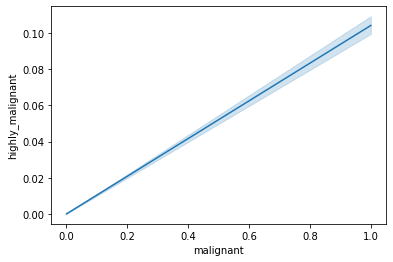

In [62]:
sns.lineplot(x='malignant',y='highly_malignant',data=df_train)
plt.show()

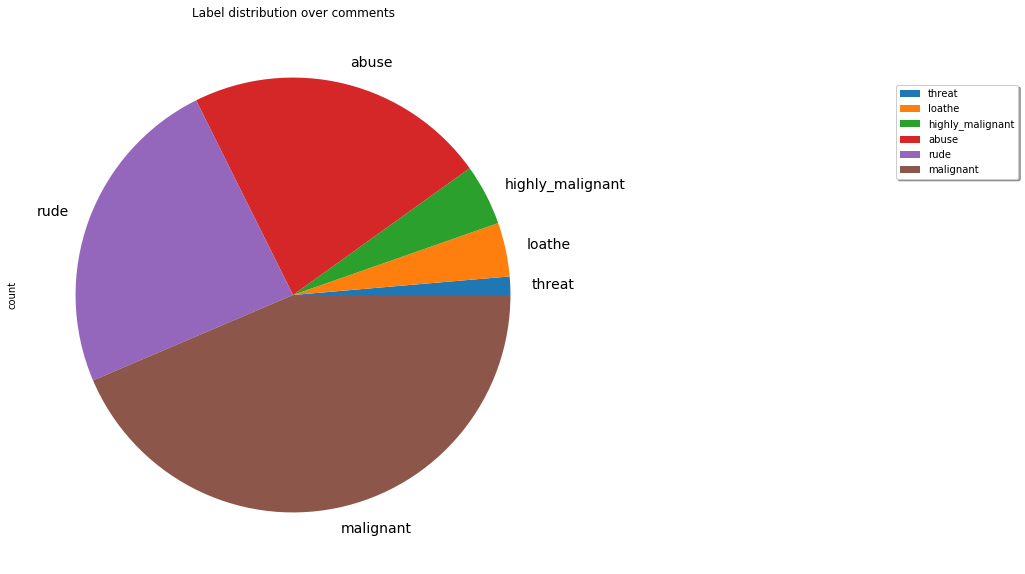

In [63]:
columns = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df = df_train[columns].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df.plot.pie(y='count',
                                      title='Label distribution over comments', fontsize=14,
                                      figsize=(10, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.6, 0.8),shadow=True)
plt.show()

From all the column Malignant is high in count, then come next rude and abuse. Least is threat, as it count is very less.

In [64]:
df_train.columns

Index(['comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [65]:
columns=['malignant','highly_malignant','rude','threat','abuse','loathe']

target=df_train[columns]
df_train['bad']=df_train[columns].sum(axis=1)
print(df_train['bad'].value_counts())
df_train['bad']=df_train['bad']>0
df_train['bad']=df_train['bad'].astype(int)
print(df_train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


0    143346
1     16225
Name: bad, dtype: int64


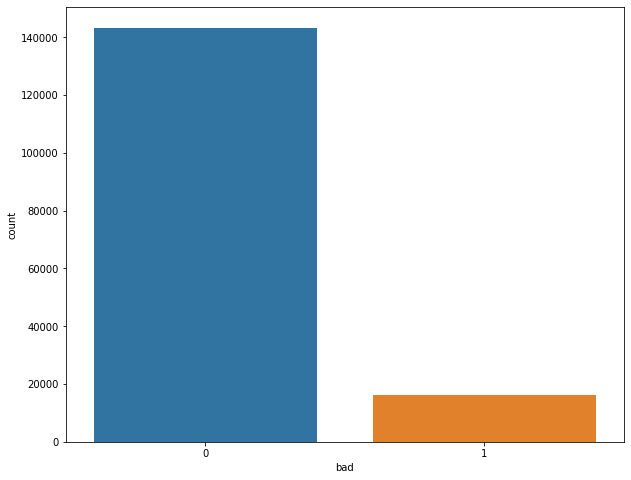

In [66]:
print(df_train['bad'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x='bad',data=df_train)
plt.show()

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(stop_words='english')
features = tf_vec.fit_transform(df_train['comment_text'])
x = features

In [68]:
y=df_train['bad']
y

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: bad, Length: 159571, dtype: int32

### Handling Imbalance dataset

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
SM=SMOTE()
SM

SMOTE()

In [71]:
x,y=SM.fit_resample(x,y)

In [72]:
y.value_counts()

0    143346
1    143346
Name: bad, dtype: int64

Now we have balance the target variables.

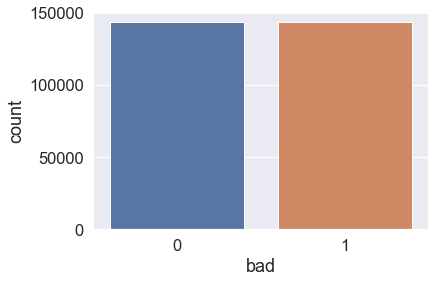

In [204]:
sns.countplot(y)
plt.show()

We have balanced the target variable. We are good to proceed further.

# Model Building

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.30)

In [74]:
x_train.shape

(200684, 173801)

In [75]:
x_test.shape

(86008, 173801)

In [76]:
y_train.shape

(200684,)

In [77]:
y_test.shape

(86008,)

In [123]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,auc,roc_curve,roc_auc_score,log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import SGDClassifier

# Logistic Regression

In [79]:
lg=LogisticRegression()

In [80]:
lg.fit(x_train,y_train)

LogisticRegression()

In [81]:
lg_pred=lg.predict(x_test)

In [124]:
print("Accuracy Score is:",accuracy_score(lg_pred,y_test)*100)
print("Log Loss is:",log_loss(lg_pred,y_test))
print("Classification Report is:\n",classification_report(lg_pred,y_test))
print("Confusion Matrix is:\n",confusion_matrix(y_test,lg_pred))

Accuracy Score is: 93.30062319784206
Log Loss is: 2.3139003909474187
Classification Report is:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     40877
           1       0.96      0.91      0.93     45131

    accuracy                           0.93     86008
   macro avg       0.93      0.93      0.93     86008
weighted avg       0.93      0.93      0.93     86008

Confusion Matrix is:
 [[38982  3867]
 [ 1895 41264]]


In Logistic Regression we got the accuracy score 93%.

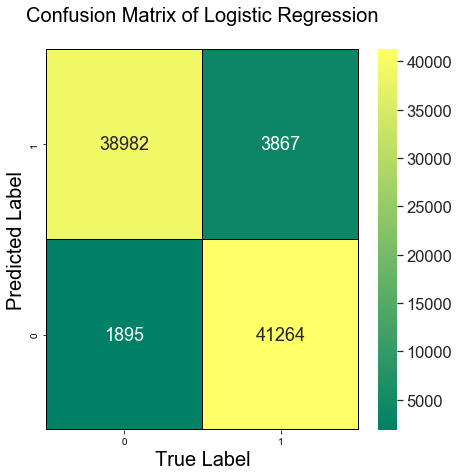

In [83]:
CM=confusion_matrix(y_test,lg_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))

sns.set(font_scale=1.5)

sns.heatmap(CM, axes=axes,annot=True,linecolor='black',xticklabels=x_axis,yticklabels=y_axis,cmap='summer',fmt='0.0f',linewidth=.2)

plt.xlabel('True Label',fontsize=20)
plt.ylabel('Predicted Label',fontsize=20)

plt.title("Confusion Matrix of Logistic Regression\n",fontsize=20)

plt.show()

In [84]:
auc_score=roc_auc_score(y_test,lg_pred)
print(auc_score)

0.9329227204574138


In [85]:
tpr,fpr,threshold=roc_curve(y_test,lg_pred)

In [86]:
tpr

array([0.        , 0.09024715, 1.        ])

In [87]:
fpr

array([0.        , 0.95609259, 1.        ])

In [88]:
threshold

array([2, 1, 0])

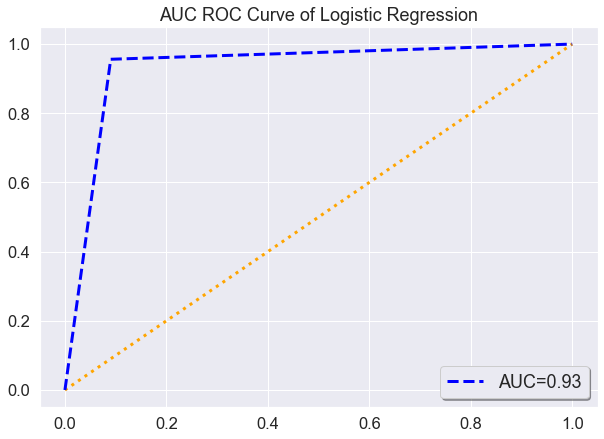

In [89]:
plt.figure(figsize=(10,7))
plt.plot([0,1],[0,1],color='orange',linestyle=":",lw=3)
plt.plot(tpr,fpr,label="AUC=%0.2F"% auc_score,color='blue',linestyle="--",lw=3)
plt.legend(fancybox=True,shadow=True,fontsize='medium')
plt.title("AUC ROC Curve of Logistic Regression")
plt.show()

# Multinomial NB

In [90]:
mnb=MultinomialNB()

In [91]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [92]:
mnb_pred=mnb.predict(x_test)
mnb_pred

array([0, 1, 0, ..., 0, 1, 0])

In [125]:
print("Accuracy Score is:",accuracy_score(y_test,mnb_pred)*100)
print("Log Loss is:",log_loss(y_test,mnb_pred))
print("Classification Report is:\n",classification_report(y_test,mnb_pred))
print("Confusion Matrix is:\n",confusion_matrix(y_test,mnb_pred))

Accuracy Score is: 90.57645800390661
Log Loss is: 3.2548037378373067
Classification Report is:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     42849
           1       0.93      0.88      0.90     43159

    accuracy                           0.91     86008
   macro avg       0.91      0.91      0.91     86008
weighted avg       0.91      0.91      0.91     86008

Confusion Matrix is:
 [[39876  2973]
 [ 5132 38027]]


In MultinomialNB we got the accuracy score 91%.

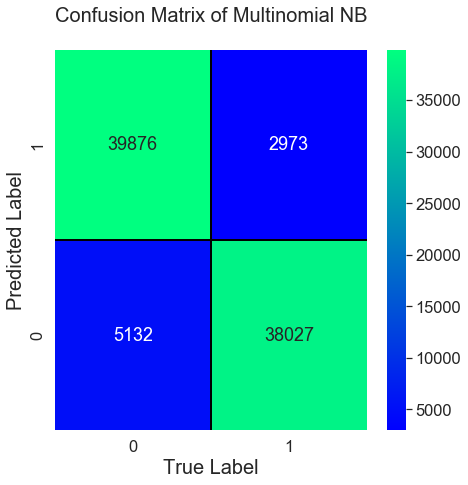

In [94]:
CM=confusion_matrix(y_test,mnb_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))

sns.set(font_scale=1.5)

sns.heatmap(CM, axes=axes,annot=True,linecolor='black',xticklabels=x_axis,yticklabels=y_axis,cmap='winter',fmt='0.0f',linewidth=.2)

plt.xlabel('True Label',fontsize=20)
plt.ylabel('Predicted Label',fontsize=20)

plt.title("Confusion Matrix of Multinomial NB\n",fontsize=20)

plt.show()

In [95]:
auc_score=roc_auc_score(y_test,mnb_pred)
print("The value of AUC Score:", auc_score)

The value of AUC Score: 0.9058538336538211


In [96]:
tpr,fpr,threshold=roc_curve(y_test,mnb_pred)

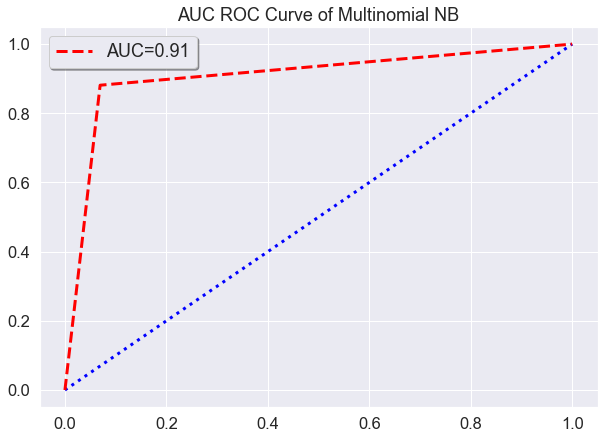

In [97]:
plt.figure(figsize=(10,7))
plt.plot([0,1],[0,1],color='blue',linestyle=":",lw=3)
plt.plot(tpr,fpr,label="AUC=%0.2F"% auc_score,color='red',linestyle="--",lw=3)
plt.legend(fancybox=True,shadow=True,fontsize='medium')
plt.title("AUC ROC Curve of Multinomial NB")
plt.show()

# Compliment NB

In [98]:
cnb=ComplementNB()

In [99]:
cnb.fit(x_train,y_train)

ComplementNB()

In [100]:
cnb_pred=cnb.predict(x_test)
cnb_pred

array([0, 1, 0, ..., 0, 1, 0])

In [126]:
print("Accuracy Score is:",accuracy_score(y_test,cnb_pred)*100)
print("Log Loss is:",log_loss(y_test,cnb_pred))
print("Classification Report is:\n",classification_report(y_test,cnb_pred))
print("Confusion Matrix is:\n",confusion_matrix(y_test,cnb_pred))

Accuracy Score is: 90.7101664961399
Log Loss is: 3.208622553651645
Classification Report is:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     42849
           1       0.93      0.88      0.91     43159

    accuracy                           0.91     86008
   macro avg       0.91      0.91      0.91     86008
weighted avg       0.91      0.91      0.91     86008

Confusion Matrix is:
 [[39866  2983]
 [ 5007 38152]]


In Complement Naive Bayes model we got the accuracy score is 91%.

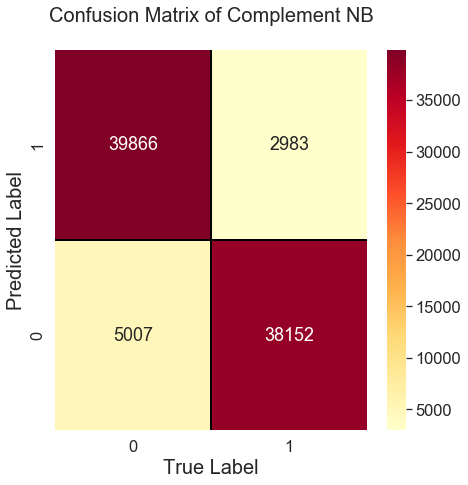

In [102]:
CM=confusion_matrix(y_test,cnb_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))

sns.set(font_scale=1.5)

sns.heatmap(CM, axes=axes,annot=True,linecolor='black',xticklabels=x_axis,yticklabels=y_axis,cmap='YlOrRd',fmt='0.0f',linewidth=.2)

plt.xlabel('True Label',fontsize=20)
plt.ylabel('Predicted Label',fontsize=20)

plt.title("Confusion Matrix of Complement NB\n",fontsize=20)

plt.show()

In [103]:
auc_score=roc_auc_score(y_test,cnb_pred)
print("The value of AUC Score:", auc_score)

The value of AUC Score: 0.9071852784616333


In [104]:
tpr,fpr,threshold=roc_curve(y_test,cnb_pred)

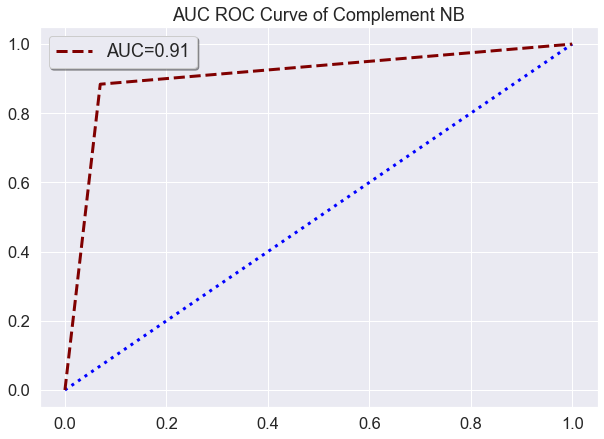

In [105]:
plt.figure(figsize=(10,7))
plt.plot([0,1],[0,1],color='blue',linestyle=":",lw=3)
plt.plot(tpr,fpr,label="AUC=%0.2F"% auc_score,color='maroon',linestyle="--",lw=3)
plt.legend(fancybox=True,shadow=True,fontsize='medium')
plt.title("AUC ROC Curve of Complement NB")
plt.show()

# Passive Aggresive Classifier

In [106]:
pac=PassiveAggressiveClassifier()

In [107]:
pac.fit(x_train,y_train)

PassiveAggressiveClassifier()

In [108]:
pac_pred=pac.predict(x_test)
print(pac_pred)

[0 1 0 ... 0 1 0]


In [127]:
print("Accuracy score is:",accuracy_score(y_test,pac_pred)*100)
print("Log Loss is:",log_loss(y_test,pac_pred))
print("Classification report:\n",classification_report(y_test,pac_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,pac_pred))

Accuracy score is: 95.70737605804112
Log Loss is: 1.482652026019652
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.96     42849
           1       0.93      0.99      0.96     43159

    accuracy                           0.96     86008
   macro avg       0.96      0.96      0.96     86008
weighted avg       0.96      0.96      0.96     86008

Confusion Matrix:
 [[39381  3468]
 [  224 42935]]


In Passive Aggressive Classifier we got the accuracy score 96%.

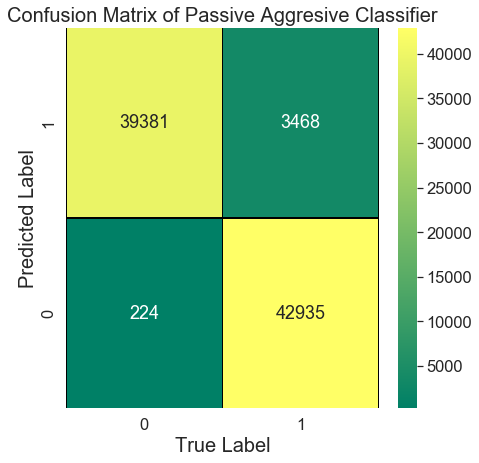

In [110]:
CM=confusion_matrix(y_test,pac_pred)

x_axis=['0','1']
y_axis=['1','0']

figure, axes=plt.subplots(figsize=(7,7))

sns.set(font_scale=1.5)

sns.heatmap(CM, axes=axes, annot=True, cmap='summer', xticklabels=x_axis,yticklabels=y_axis,fmt='0.0f',linecolor='black',linewidth=.2)
plt.xlabel("True Label",fontsize=20)
plt.ylabel("Predicted Label",fontsize=20)
plt.title("Confusion Matrix of Passive Aggresive Classifier",fontsize=20)
plt.show()

In [111]:
auc_score=roc_auc_score(y_test,pac_pred)
print("The value of AUC Score is:",auc_score)

The value of AUC Score is: 0.9569372556466351


In [112]:
tpr,fpr,threshold=roc_curve(y_test,pac_pred)

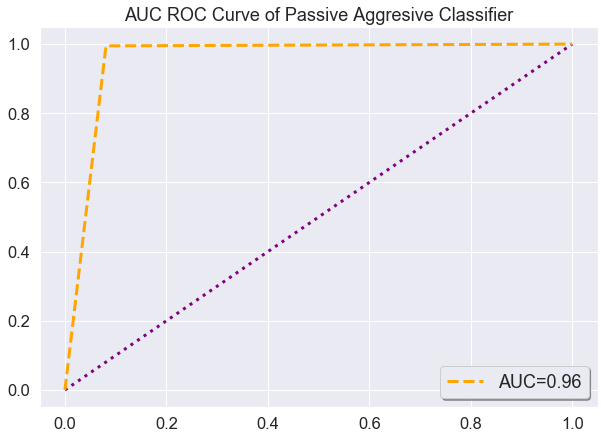

In [113]:
plt.figure(figsize=(10,7))
plt.plot([0,1],[0,1],color='purple',linestyle=":",lw=3)
plt.plot(tpr,fpr,label="AUC=%0.2F"% auc_score,color='orange',linestyle="--",lw=3)
plt.legend(fancybox=True,shadow=True,fontsize='medium')
plt.title("AUC ROC Curve of Passive Aggresive Classifier")
plt.show()

# SGD Classifier

In [114]:
sgd=SGDClassifier()

In [115]:
sgd.fit(x_train,y_train)

SGDClassifier()

In [116]:
sgd_pred=sgd.predict(x_test)
sgd_pred

array([0, 1, 0, ..., 0, 1, 0])

In [128]:
print("Accuracy score is:",accuracy_score(y_test,sgd_pred)*100)
print("Log Loss is:",log_loss(y_test,sgd_pred))
print("Classification report:\n",classification_report(y_test,sgd_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,sgd_pred))

Accuracy score is: 89.23588503395034
Log Loss is: 3.717855413303373
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.89     42849
           1       0.86      0.94      0.90     43159

    accuracy                           0.89     86008
   macro avg       0.90      0.89      0.89     86008
weighted avg       0.90      0.89      0.89     86008

Confusion Matrix:
 [[36200  6649]
 [ 2609 40550]]


In SG Classifier model we got the accuracy score 89%.

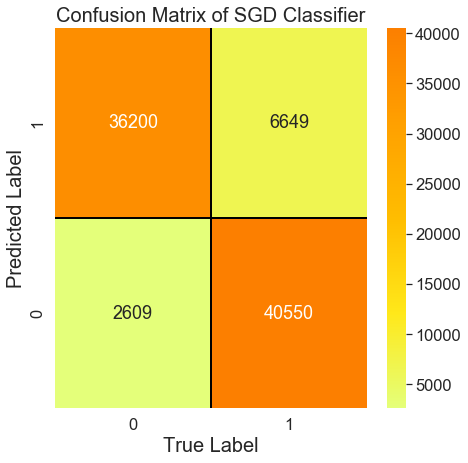

In [118]:
CM=confusion_matrix(y_test,sgd_pred)

x_axis=['0','1']
y_axis=['1','0']

figure, axes=plt.subplots(figsize=(7,7))

sns.set(font_scale=1.5)

sns.heatmap(CM, axes=axes, annot=True, cmap='Wistia', xticklabels=x_axis,yticklabels=y_axis,fmt='0.0f',linecolor='black',linewidth=.2)
plt.xlabel("True Label",fontsize=20)
plt.ylabel("Predicted Label",fontsize=20)
plt.title("Confusion Matrix of SGD Classifier",fontsize=20)
plt.show()

In [119]:
auc_score=roc_auc_score(y_test,sgd_pred)
print("The value of AUC Score is:",auc_score)

The value of AUC Score is: 0.892188146469888


In [120]:
tpr,fpr,threshold=roc_curve(y_test,sgd_pred)

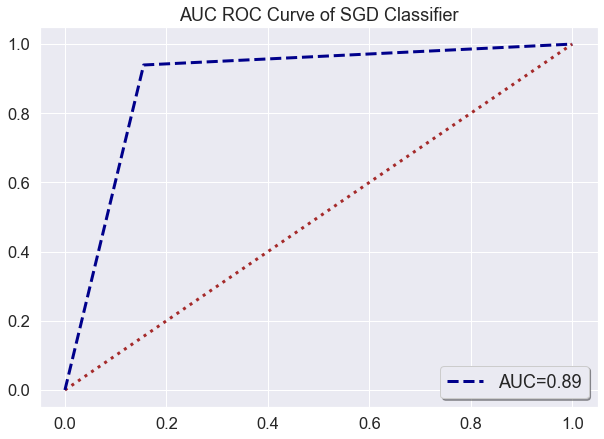

In [121]:
plt.figure(figsize=(10,7))
plt.plot([0,1],[0,1],color='brown',linestyle=":",lw=3)
plt.plot(tpr,fpr,label="AUC=%0.2F"% auc_score,color='darkblue',linestyle="--",lw=3)
plt.legend(fancybox=True,shadow=True,fontsize='medium')
plt.title("AUC ROC Curve of SGD Classifier")
plt.show()

# Cross Validation Score

In [122]:
print("Cross Validation score of Logistic Regression:",cross_val_score(lg,x,y,cv=5).mean()*100)
print("Cross Validation score of Multinomial NB:",cross_val_score(mnb,x,y,cv=5).mean()*100)
print("Cross Validation score of Complement NB:",cross_val_score(cnb,x,y,cv=5).mean()*100)
print("Cross Validation score of Passive Agressive Classifier:",cross_val_score(pac,x,y,cv=5).mean()*100)
print("Cross Validation score of SGD Classifier:",cross_val_score(sgd,x,y,cv=5).mean()*100)

Cross Validation score of Logistic Regression: 93.56661966857327
Cross Validation score of Multinomial NB: 91.00323829011178
Cross Validation score of Complement NB: 91.01300476668094
Cross Validation score of Passive Agressive Classifier: 95.84641458714086
Cross Validation score of SGD Classifier: 89.2086353361524


After analysis of various machine learning model and cross validation score Passive Agressive Classifier perform well, gives the good score 96%. So, I will consider Passive Aggresive model as my final model.

# Hyper Parameter Tuning

In [145]:
params={
        'n_features':[4,7,10],
       'random_state':[79,85,99]}

In [132]:
from sklearn.model_selection import GridSearchCV

In [158]:
model=PassiveAggressiveClassifier(fit_intercept=True, max_iter=500, tol=0.001, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, shuffle=True, verbose=3, loss='hinge', n_jobs=None, random_state=95, warm_start=False, class_weight=None, average=False)

In [159]:
model.fit(x_train,y_train)

-- Epoch 1
Norm: 174.39, NNZs: 65388, Bias: 0.993626, T: 200506, Avg. loss: 0.209509
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 222.26, NNZs: 67735, Bias: 1.006662, T: 401012, Avg. loss: 0.113731
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 253.71, NNZs: 68595, Bias: 1.050360, T: 601518, Avg. loss: 0.086272
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 277.91, NNZs: 69043, Bias: 1.093963, T: 802024, Avg. loss: 0.071542
Total training time: 0.43 seconds.
-- Epoch 5
Norm: 297.57, NNZs: 69373, Bias: 1.020929, T: 1002530, Avg. loss: 0.062509
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 314.26, NNZs: 69555, Bias: 1.032661, T: 1203036, Avg. loss: 0.056223
Total training time: 0.62 seconds.
-- Epoch 7
Norm: 329.22, NNZs: 69779, Bias: 1.025907, T: 1403542, Avg. loss: 0.051523
Total training time: 0.71 seconds.
-- Epoch 8
Norm: 342.21, NNZs: 69936, Bias: 1.070356, T: 1604048, Avg. loss: 0.047346
Total training time: 0.80 seconds.
-- Epoch 9
Norm: 353.80, NNZs: 70033

PassiveAggressiveClassifier(max_iter=500, random_state=95, verbose=3)

In [160]:
model_pred=model.predict(x_test)
model_pred

array([0, 1, 0, ..., 0, 1, 0])

In [161]:
print("Accuracy score is:",accuracy_score(y_test,model_pred)*100)
print("Log Loss is:",log_loss(y_test,model_pred))
print("Classification report:\n",classification_report(y_test,model_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,model_pred))

Accuracy score is: 95.75969677239327
Log Loss is: 1.4645803756293032
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.96     42849
           1       0.93      0.99      0.96     43159

    accuracy                           0.96     86008
   macro avg       0.96      0.96      0.96     86008
weighted avg       0.96      0.96      0.96     86008

Confusion Matrix:
 [[39458  3391]
 [  256 42903]]


In [167]:
model.score(x_train,y_train)

0.993686591855853

In [168]:
model.intercept_

array([1.02013802])

In [169]:
model.coef_

array([[-2.69354523,  8.864979  , -0.12029241, ...,  1.01768785,
        -0.06495712, -2.07862774]])

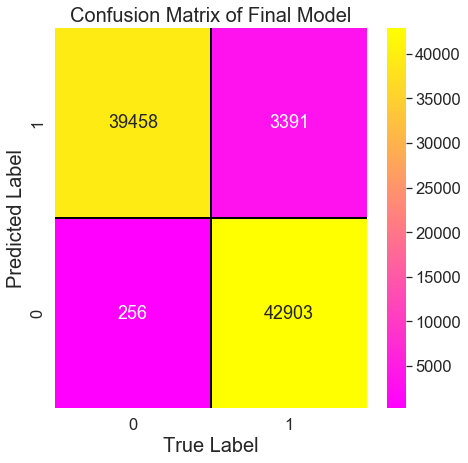

In [162]:
CM=confusion_matrix(y_test,model_pred)

x_axis=['0','1']
y_axis=['1','0']

figure, axes=plt.subplots(figsize=(7,7))

sns.set(font_scale=1.5)

sns.heatmap(CM, axes=axes, annot=True, cmap='spring', xticklabels=x_axis,yticklabels=y_axis,fmt='0.0f',linecolor='black',linewidth=.2)
plt.xlabel("True Label",fontsize=20)
plt.ylabel("Predicted Label",fontsize=20)
plt.title("Confusion Matrix of Final Model",fontsize=20)
plt.show()

In [163]:
auc_score=roc_auc_score(y_test,model_pred)
print("The value of AUC Score is:",auc_score)

The value of AUC Score is: 0.9574650374825262


In [164]:
tpr,fpr,threshold=roc_curve(y_test,model_pred)

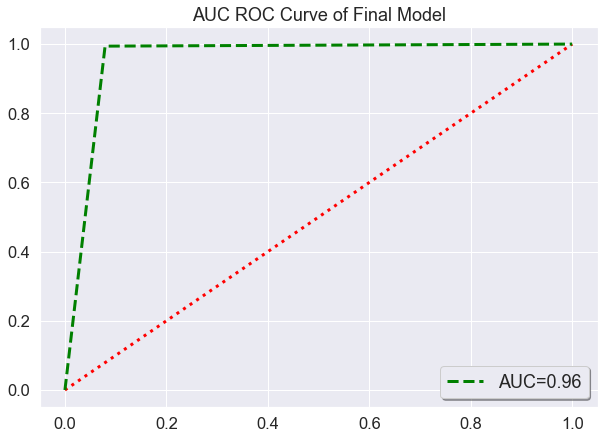

In [166]:
plt.figure(figsize=(10,7))
plt.plot([0,1],[0,1],color='red',linestyle=":",lw=3)
plt.plot(tpr,fpr,label="AUC=%0.2F"% auc_score,color='green',linestyle="--",lw=3)
plt.legend(fancybox=True,shadow=True,fontsize='medium')
plt.title("AUC ROC Curve of Final Model")
plt.show()

Before tuning the model the accuracy sore was 95.70 and after tuning the model the accuracy score is 95.75. There is a little bit increase in the accuracy.

In [194]:
from sklearn.metrics import plot_roc_curve

<Figure size 1800x1440 with 0 Axes>

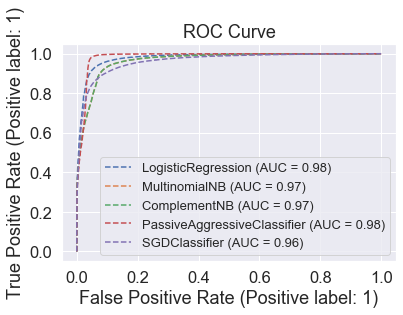

In [201]:
#Visualizing ROC Curve of all models.
plt.figure(figsize=(25,20))
distp=plot_roc_curve(lg,x_test,y_test,linestyle='--')
plot_roc_curve(mnb,x_test,y_test,ax=distp.ax_,linestyle='--')
plot_roc_curve(cnb,x_test,y_test,ax=distp.ax_,linestyle='--')
plot_roc_curve(pac,x_test,y_test,ax=distp.ax_,linestyle='--')
plot_roc_curve(sgd,x_test,y_test,ax=distp.ax_,linestyle='--')
plt.legend(prop={'size':13}, loc='lower right')
plt.title("ROC Curve")
plt.show()

# Saving the Model

In [170]:
import pickle

In [171]:
filename='Malignant-comments_classifier.pickle'

In [172]:
pickle.dump(model,open(filename,'wb'))

In [173]:
loaded_model=pickle.load(open(filename,'rb'))

In [174]:
loaded_model_pred=loaded_model.predict(x_test)
loaded_model_pred

array([0, 1, 0, ..., 0, 1, 0])

In [175]:
loaded_model.score(x_train,y_train)

0.993686591855853

In [176]:
df=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Actual'])
df

,0,1,2,3,4,5,6,7,8,9,...,85998,85999,86000,86001,86002,86003,86004,86005,86006,86007
Predicted,0,1,0,1,0,1,1,1,1,0,...,0,0,0,1,0,0,1,0,1,0
Actual,0,1,0,1,0,1,1,1,1,0,...,0,0,0,1,0,0,1,0,1,0


We see that Predicted and Actual value is almost same. Our model has performed well in making the prediction.

### Making the prediction for the test dataset.

In [178]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule is more succesful then youll ...
1,0000247867823ef7,from rfc the title is fine as it is imo
2,00013b17ad220c46,sources zawe ashton on lapland
3,00017563c3f7919a,if you have a look back at the source the info...
4,00017695ad8997eb,i dont anonymously edit articles at all


In [181]:
X=df_test['comment_text']
X

0         yo bitch ja rule is more succesful then youll ...
1                   from rfc the title is fine as it is imo
2                            sources zawe ashton on lapland
3         if you have a look back at the source the info...
4                   i dont anonymously edit articles at all
                                ...                        
153159    i totally agree this stuff is nothing but too ...
153160    throw from out field to home plate does it get...
153161    okinotorishima categories i see your changes a...
153162    one of the founding nations of the eu germany ...
153163    stop already your bullshit is not welcome here...
Name: comment_text, Length: 153164, dtype: object

In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer as tf

In [188]:
test=tf(input='content', encoding='utf-8', lowercase=True,stop_words='english',ngram_range=(1,3))
test_x=test.fit_transform(X)

In [189]:
test_x.shape

(153164, 6095622)

In [ ]:
test_result=model.predict(text_x)

In [192]:
df.to_csv('malignant_comments_prediction.csv')

Saved our final prediction in the csv format.

# Inference

 On visualization of countplot for Malignant, Highly Malignant, Abuse, Threat, Loathe most of them use the abuse language in the comments. We have visualized the bad comments in the word cloud. In the comments there are lots of stopwords, punctuation etc. I have cleaned the data and make the prediction. In the social media people shows the hatred in the comment. With this analysis and prediction, we came to conclude which comments is good and bad. So, that in future we can restrict those comments and spread peace, positive vibes in the social media platform. 